In [100]:
import pandas as pd

file_path = r"dataset.xls"
df_raw_data = pd.read_excel(file_path, header=None, engine='xlrd')

## Данные. Выполнить первичную обработку данных. Сделать первые выводы.

### 1. Рассмотрите данные и вычислите основные характеристики признаков: среднее, стандартное отклонение, медиана, квартили.  Постройте гистограммы признаков и блок диаграммы  признаков. Сделайте первые выводы о возможном распределении признаков.

#### Найдем среднее по каждому столбцу


In [101]:
NAME_OF_FEATURES = ['age', 'dependents', 'income', 'length of stay', 'car assessment', 'credit size']

df_raw_data.columns = NAME_OF_FEATURES

for col in df_raw_data.columns:
    print(f"mean value for colunmn {col} = {df_raw_data[col].mean()}")
    print('\n')

mean value for colunmn age = 39.298507462686565


mean value for colunmn dependents = 2.0869565217391304


mean value for colunmn income = 19861.764705882353


mean value for colunmn length of stay = 10.101449275362318


mean value for colunmn car assessment = 20852.941176470587


mean value for colunmn credit size = 198492.53731343284




Этот цикл проходит по всем столбцам и выводит среднее значение (mean) каждого признака.

#### Найдем стандартное отклонение по каждому столбцу

In [102]:
for col in df_raw_data.columns:
    print(f"standart deviation for colunmn {col} = {df_raw_data[col].std()}")
    print('\n')

standart deviation for colunmn age = 8.700426540176295


standart deviation for colunmn dependents = 0.9961562958335907


standart deviation for colunmn income = 10169.342710701167


standart deviation for colunmn length of stay = 4.932321156044054


standart deviation for colunmn car assessment = 10692.813468731472


standart deviation for colunmn credit size = 99837.3485003769




Здесь вычисляется стандартное отклонение каждого признака — мера разброса данных относительно среднего.

Чем больше стандартное отклонение, тем сильнее варьируются значения признака.

Стандартное отклонение: 

$$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

#### Найдем медиану по каждому столбцу

In [103]:
for col in df_raw_data.columns:
    print(f"median for column {col} = {df_raw_data[col].median()}")
    print('\n')

median for column age = 38.0


median for column dependents = 2.0


median for column income = 20250.0


median for column length of stay = 9.0


median for column car assessment = 20500.0


median for column credit size = 200000.0




Здесь находится медиана каждого признака — значение, которое делит выборку пополам.
Медиана устойчива к выбросам, поэтому часто используется при анализе «грязных» данных.

$$\text{Median}(X) = \begin{cases} 
x_{\frac{n+1}{2}} & \text{ если } n \text{ нечётное,} \\
\frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2} & \text{ если } n \text{ чётное}
\end{cases}$$

#### Находим квартили

In [104]:
for col in df_raw_data.columns:
    print(f"Q1 for colunmn {col} = {df_raw_data[col].quantile(0.25)}")
    print(f"Q2 for colunmn {col} = {df_raw_data[col].quantile(0.5)}")
    print(f"Q3 for colunmn {col} = {df_raw_data[col].quantile(0.75)}")
    print('\n')

Q1 for colunmn age = 34.0
Q2 for colunmn age = 38.0
Q3 for colunmn age = 46.0


Q1 for colunmn dependents = 1.0
Q2 for colunmn dependents = 2.0
Q3 for colunmn dependents = 3.0


Q1 for colunmn income = 11125.0
Q2 for colunmn income = 20250.0
Q3 for colunmn income = 27125.0


Q1 for colunmn length of stay = 7.0
Q2 for colunmn length of stay = 9.0
Q3 for colunmn length of stay = 14.0


Q1 for colunmn car assessment = 12000.0
Q2 for colunmn car assessment = 20500.0
Q3 for colunmn car assessment = 28000.0


Q1 for colunmn credit size = 118000.0
Q2 for colunmn credit size = 200000.0
Q3 for colunmn credit size = 265500.0




Этот цикл вычисляет квартили для каждого признака:

$Q_1$ (25\%) — нижняя граница (значение, меньше которого 25\% наблюдений),

$Q_2$ (50\%) — медиана,

$Q_3$ (75\%) — верхняя граница (значение, меньше которого 75\% наблюдений).

Квартили применяются для оценки распределения данных и поиска выбросов.





#### Построение гистограмм

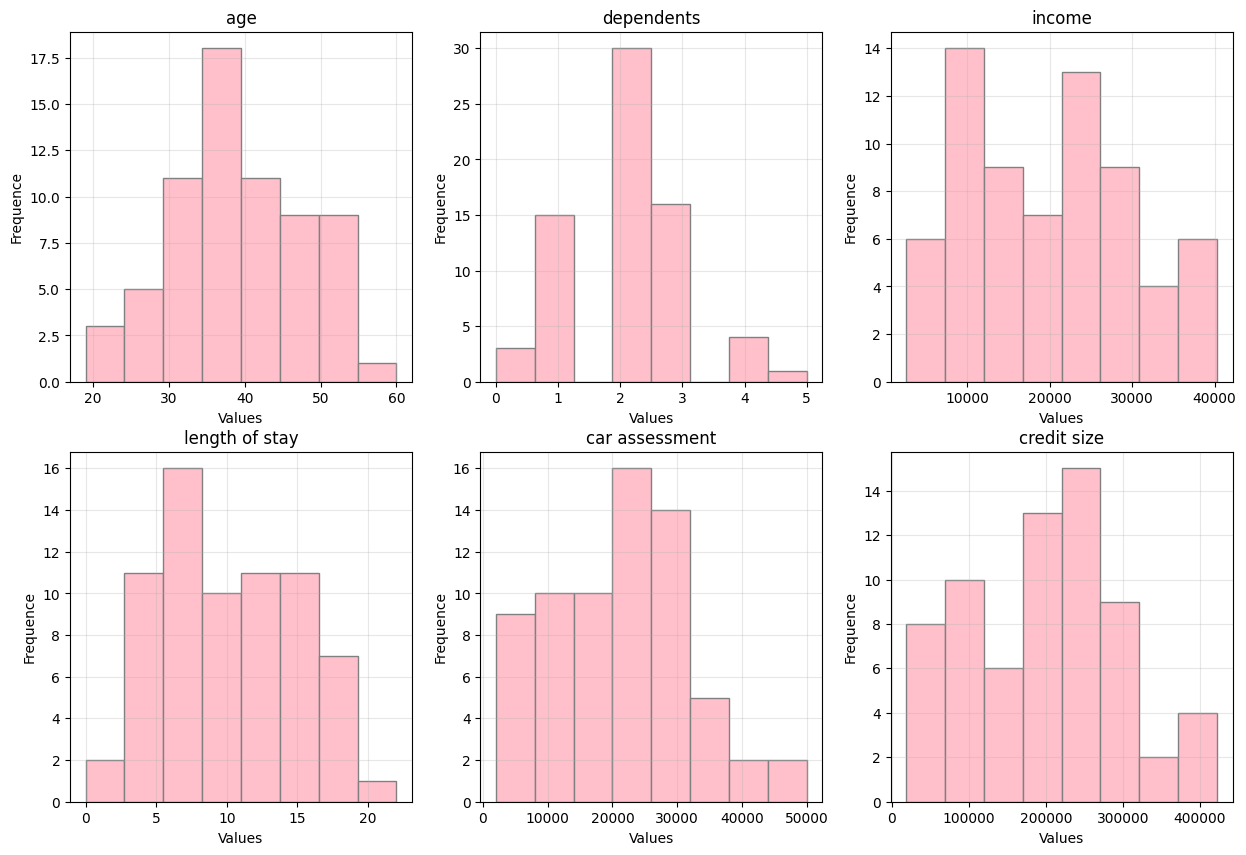

In [132]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df_raw_data.columns):
    axes[i].hist(df_raw_data[col], color='pink', edgecolor='grey', bins=8)
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequence')
    axes[i].grid(alpha=0.3)



Построим гистограммы распределения значений каждого признака.

#### Построение boxplots

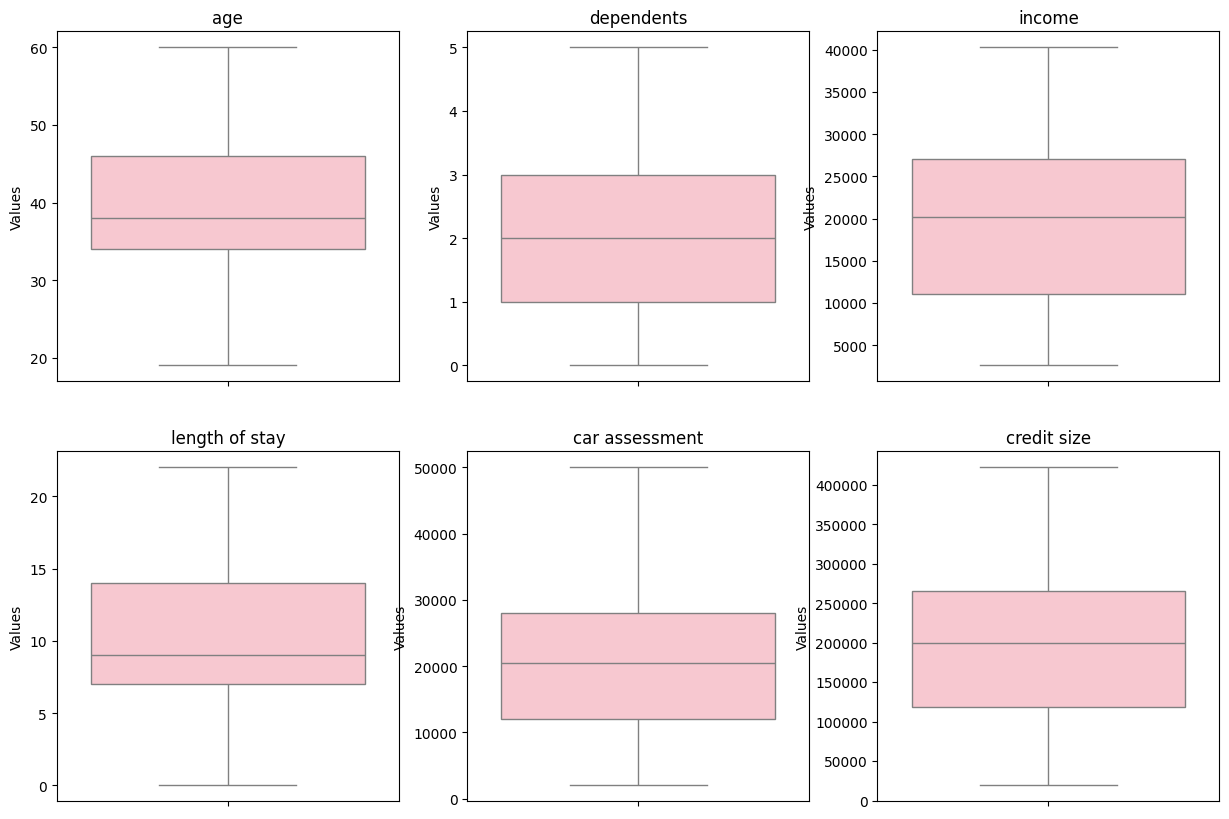

In [106]:
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(df_raw_data.columns):
    sns.boxplot(data=df_raw_data, y=col, ax=axes[i], color='pink', linecolor='grey')
    axes[i].set_title(col)
    axes[i].set_ylabel("Values")
    

Также построим блок-диаграммы признаков.

На каждом подграфике показывается распределение признака:

- "ящик" отражает диапазон между 1-м и 3-м квартилем (Q1–Q3),

- линия внутри — медиана,

- "усы" — диапазон допустимых значений.

Теперь сделаем первые выводы касаемо возможного распределения признаков: 

**Возраст (лет):**

- Диапазон значений: примерно от 20 до 60 лет.

- Средние значения: сосредоточены около 38–42 лет.

- Медиана близка к среднему, что указывает на относительно симметричное распределение.

- На гистограмме распределение близко к нормальному с лёгким смещением вправо (в сторону более старших клиентов).

Вывод о возможном распределении: признак распределён близко к нормальному, клиенты в основном зрелого возраста, без существенных экстремальных значений.

**Количество иждивенцев:**

- Значения: дискретные (0–5).

- Наиболее частое значение: 2 иждивенца.

- Гистограмма показывает чёткий пик на значении 2 и меньшую частоту на 0, 1 и 3.

- Boxplot не выявляет выраженных выбросов, разброс умеренный.

- Поскольку признак является категориальным числовым, нормальность не применима, но распределение явно модальное с пиком в центре.

Вывод: признак имеет модальное распределение с максимумом в области 2 иждивенцев. Большинство клиентов имеют 2-х иждивенцев.

**Доход (руб./мес.):**

- Диапазон: примерно от 5 000 до 40 000 руб.

- Среднее превышает медиану, что говорит о правосторонней (положительной) асимметрии.

- Гистограмма: значительная часть клиентов с доходами до 25–30 тыс. руб., несколько высокодоходных клиентов увеличивают среднее.

Вывод: распределение дохода умеренно правостороннее (с наклоном вправо), большинство клиентов имеет доход от 5 до 25 тыс. руб./мес.

**Срок проживания в регионе (лет):**

- Диапазон: 0–22 года.

- Медиана: около 9 лет, среднее чуть выше, что говорит о небольшой правосторонней асимметрии.

- На гистограмме большинство клиентов проживают в регионе от 5 до 15 лет.

- Имеются единичные наблюдения с нулевым стажем — вероятно, новые клиенты банка.

Вывод: распределение близко к нормальному, большинство клиентов — жители региона со стажем 5–15 лет, что может говорить о стабильности клиентской базы.

**Оценка автомобиля заемщика (USD):**

- Диапазон: примерно от 5 000 до 50 000 USD.

- Среднее значение несколько выше медианы — правостороннее распределение, наличие отдельных клиентов с высоко оценёнными автомобилями.

- Boxplot показывает заметный разброс, но выбросы не критичны.

- Гистограмма имеет широкий пик в диапазоне 15 000–30 000 USD.

Вывод: Признак распределён с наклоном вправо, что естественно: большинство автомобилей средней стоимости, отдельные — премиум-класса.

**Размер кредита (тыс. руб.):**

- Диапазон: примерно от 50 000 до 400 000 руб.

- Среднее также превышает медиану, что указывает на правостороннюю асимметрию.

- Boxplot показывает, что значения сгруппированы вокруг 200–250 тыс. руб.

- На гистограмме видно, что большинство кредитов не превышает 300 тыс. руб.

Вывод: Распределение правостороннее; типичный размер кредита 200–250 тыс. руб.

**Итак, общие выводы по всем признакам:**

1. Все признаки имеют естественные границы и реалистичные значения.

2. Для большинства количественных признаков наблюдается умеренная правосторонняя асимметрия, что типично для экономических данных.

3. Медианы близки к средним у «возраста» и «срока проживания» — эти признаки близки к нормальному распределению.

4. Выбросы минимальны, исключений, требующих удаления, немного.

5. Полученные графики подтверждают, что данные можно использовать для методов, чувствительных к масштабу (например, PCA), после нормировки и центрирования.

### 2. В данных есть пропуски. Подберите из литературы метод восстановления пропущенных данных и заполните пропуски по этому методу. 


In [107]:
print(f'В процентах\n{(df_raw_data.isnull().sum() / df_raw_data.count()) * 100} ')

В процентах
age               7.462687
dependents        4.347826
income            5.882353
length of stay    4.347826
car assessment    5.882353
credit size       7.462687
dtype: float64 


Смотрим где и сколько данных отсутствует. По каждому столбцу возвращаем процент пропусков.

#### KNN

Мы решили заполнить пропущенные данные методом ближайших соседей (KNN), который основан на предположении, что похожие объекты имеют схожие значения признаков.

Алгоритм работы:

1. Для каждой записи с пропуском ищется k ближайших объектов (по евклидову расстоянию или другому методу).

2. Рассматриваются только те соседи, у которых в этом признаке нет пропусков.

3. Пропущенное значение заполняется:

- либо простым средним по соседям (weights='uniform'),

- либо взвешенным средним, где ближние соседи имеют больший вес (weights='distance').

Восстановление пропущенного значения для объекта $i$:

$$\hat{x}_i = \frac{\sum_{j=1}^{k} w_j x_j}{\sum_{j=1}^{k} w_j}, \quad w_j = \frac{1}{d_j + \varepsilon}$$

где $x_j$ — значение признака у $j$-го соседа, $d_j$ — расстояние до $j$-го соседа, $w_j$ — вес соседа, $\varepsilon$ — малая константа для избежания деления на ноль, $k$ — количество ближайших соседей.

Преимущества метода KNN:

- Учитывает многомерную структуру данных (в отличие от простых средних/медиан).
- Может восстанавливать значения на основе похожих клиентов.
- Гибко настраивается (число соседей, тип весов, расстояние).

In [108]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='distance')

df_data_wo_nans = imputer.fit_transform(df_raw_data)

Создаем объект класса KNNImputer — модель для восстановления пропущенных значений.

Где:

- n_neighbors=5 — количество ближайших соседей, по которым будет вычисляться замена.

- weights='distance' — более близкие соседи имеют больший вес при расчёте значения (т.е. чем ближе объект, тем больше он влияет на результат).

Далее fit_transform() — обучает импьютер на данных и сразу применяет заполнение.

Для каждой записи, где есть пропуски, KNNImputer ищет 5 ближайших соседей по всем остальным признакам. Соседи выбираются по евклидовому расстоянию между объектами (строками таблицы).

Пропущенное значение заменяется на взвешенное среднее значений у соседей, найденных по этому признаку.

Результатом является массив NumPy, в котором больше нет пропусков.

In [109]:
df_data_wo_nans = df_data_wo_nans.round(0)
df_data_wo_nans = pd.DataFrame(df_data_wo_nans)

#### ДОПОЛНИТЬ ИНФОРМАЦИЮ ПРО СРЕДНЕЕ ДО/ПОСЛЕ + СТ ОТКЛОНЕНИЕ ДО/ПОСЛЕ И Т.Д. ДРУГИЕ ЛЮДИ ВЫБРАЛИ 9 СОСЕДЕЙ. НЕТ ЕДИНОГО ПОДХОДА - МЫ МОЖЕМ ВЫБРАТЬ СВОЙ ВАРИАНТ.


### 3. В данных возможны выбросы. Подберите из литературы метод определения выбросов и удалите объекты, идентифицированные как выбросы по этому методу. 

In [133]:
import numpy as np

k = 1.5
mask = np.ones(len(df_data_wo_nans), dtype=bool)

for col in df_data_wo_nans.columns:
    q1 = df_data_wo_nans[col].quantile(0.25)
    q3 = df_data_wo_nans[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr 
    upper_bound = q3 + k * iqr 
    mask &= df_data_wo_nans[col].between(lower_bound, upper_bound)

    print(f'for {col} low = {lower_bound}, upp = {upper_bound}')


df_data_wo_nans_and_outliers = df_data_wo_nans[mask].copy()
print("rows original:", df_data_wo_nans.shape[0], "rows after outlier removal:", df_data_wo_nans_and_outliers.shape[0])

for 0 low = 15.625, upp = 64.625
for 1 low = -2.0, upp = 6.0
for 2 low = -11825.0, upp = 49375.0
for 3 low = -3.5, upp = 24.5
for 4 low = -12000.0, upp = 52000.0
for 5 low = -94375.0, upp = 480625.0
rows original: 72 rows after outlier removal: 72


Для определения выбросов мы выбрали метод межквартильного размаха (IQR method):

Суть метода:
Метод основан на статистическом диапазоне центральных 50% данных — между первым и третьим квартилями (Q1 и Q3).
Значения, которые сильно выходят за этот диапазон, считаются аномальными (выбросами).



**Метод межквартильного размаха (IQR):**

Формулы для определения границ выбросов:

$$
\begin{aligned}
Q_1 &= P_{25} \\
Q_3 &= P_{75} \\
IQR &= Q_3 - Q_1 \\
\text{Нижняя граница} &= Q_1 - k \times IQR \\
\text{Верхняя граница} &= Q_3 + k \times IQR
\end{aligned}
$$

где:
- $Q_1$ - первый квартиль (25-й процентиль)
- $Q_3$ - третий квартиль (75-й процентиль)
- $IQR$ - межквартильный размах
- $k$ — это коэффициент чувствительности метода. Он определяет, насколько жестко отсекаются выбросы. Обычно он выбирается равным 1.5.

mask = np.ones(..., dtype=bool) — мы создаем "логическую маску" (массив True), длиной как количество строк в таблице.
Позже маска будет обновляться, оставляя только “хорошие” (невыбросные) строки.

Метод .between(lower_bound, upper_bound) возвращает логический вектор True/False — true, если значение в пределах диапазона, и false, если это выброс.

Преимущества метода IQR

- прост и не требует параметров распределения (в отличие от Z-score метода).
- работает на любых типах данных (не только при нормальном распределении).

In [111]:
print(f'Rows in old dataframe = {df_data_wo_nans.shape[0]}')
print(f'Rows in new dataframe = {df_data_wo_nans_and_outliers.shape[0]}')

Rows in old dataframe = 72
Rows in new dataframe = 46


Вывод: в наших данных не было существенных выбросов.

#### Нужно найти, в какой книге предлагается данный выбор определения выбросов. + Можно просто использовать другой метод определения выбросов. Alpha-метод или Z-score. Медианное абсолютное отклонение. Махаланобис. В какой-то ситуации нужно делать дополнительный анализ по отдельным признакам.

#### Можно сделать несколько методов заполнения пропусков и метода определения выбросов. Выводить индексы выбросов - самим посмотреть на них


## Снижение размерности. Метод PCA (Principal Component Analysis, метод главных компонент). 

### 4. Выполнить центрирование данных и такую нормировку, что евклидова норма каждого признака равна 1 (полученная матрица обозначается через Z). 

In [112]:
import numpy as np

x = np.array(df_data_wo_nans_and_outliers)

In [113]:
# centered data

for col in range(x.shape[1]):
    npcol = x[:, col]
    npcol -= npcol.mean()


**Центрирование данных**

Цель — преобразовать данные так, чтобы среднее значение каждого признака стало равным нулю.

$$
\mathbf{x}_j' = \mathbf{x}_j - \bar{x}_j
$$

где $\bar{x}_j = \frac{1}{n}\sum_{i=1}^{n} x_{ij}$ — выборочное среднее признака $j$.

Что делает этот цикл:

x.shape[1] — количество столбцов (признаков). Для каждого столбца вычисляется среднее значение и из всех элементов столбца вычитается среднее. Теперь каждый признак теперь имеет среднее значение, равное 0.

In [114]:
# check centered 

print(np.mean(x, axis=0, dtype=int))

[0 0 0 0 0 0]


Проверяем: печатаем средние значения по каждому столбцу.
Если всё сделано правильно, все элементы должны быть около нуля (с возможной небольшой погрешностью округления).

In [115]:
# norm data

from numpy.linalg import linalg

for col in range(x.shape[1]):
    print(np.linalg.norm(x[:, col]))
    x[:, col]  = x[:, col] / np.linalg.norm(x[:, col])

39.8682613223798
4.433077250967266
53698.1619910532
25.871337169858883
51217.07237550181
532694.6573151533


Далее выполняем нормировку каждого признака так, чтобы его евклидова норма равнялась 1. Каждый столбец делится на свою длину (норму). Перед делением программа также выводит норму каждого признака — для проверки. 

Формула нормы: 

$$\|\mathbf{x}_j\|_2 = \sqrt{\sum_{i=1}^{n} x_{ij}^2} = 1$$

Нормализация данных

После центрирования проводится масштабирование так, чтобы длина (норма) каждого признака равнялась 1:

$$
z_{ij} = \frac{x_{ij}'}{\|\mathbf{x}_j\|_2}, \quad \text{где } \|\mathbf{x}_j\|_2 = \sqrt{\sum_{i=1}^{n} x_{ij}^2} = 1
$$

In [116]:
# check normilized

print(np.linalg.norm(x, axis=0))

[1. 1. 1. 1. 1. 1.]


Результатом должен быть вектор единиц. Всё верно.

In [117]:
new_matr = pd.DataFrame(x)

После этих шагов матрица данных:

- центрирована — каждый признак имеет нулевое среднее;

- нормализована — каждый признак имеет единичную длину.

Такую матрицу обычно обозначают как $Z$, и именно она используется для:

- SVD-разложения (п.5 задания),

- PCA (метода главных компонент),

- MDS и других методов снижения размерности.

#### Проверка есть косвенная. Найти норму Фробелиуса. Она д.б. равна сумме квадратов всех элементов. Должна быть равна 6.

### 5. Найти SVD разложение матрицы Z (матрицы U, S, V). 

In [118]:
u, s, vt = np.linalg.svd(x)

Выполним сингулярное (SVD) разложение:

Используем функцию np.linalg.svd(), которая выполняет сингулярное разложение матрицы x.

На вход подаётся матрица $Z$ (центрированная и нормализованная версия исходных данных).

Функция возвращает три матрицы:

$U$, $S$, $V^T$ такие, что:

$
X = U \cdot S \cdot V^T
$

In [119]:
pd_u = pd.DataFrame(u)
pd_s = pd.DataFrame(s)
pd_vt = pd.DataFrame(vt)

$$
\begin{array}{ccl}
\hline
\text{Обозначение} & \text{Размерность} & \text{Смысл} \\
\hline
U & n \times n & \text{Матрица левых сингулярных векторов (описывает клиентов)} \\
S & n \times m & \text{Диагональная матрица (вектор) сингулярных чисел} \\
V^T & m \times m & \text{Матрица правых сингулярных векторов (описывает признаки)} \\
\hline
\end{array}
$$

#### Нужно бы вывести сингулярные числа и их квадраты. Простая проверка: справа умножаем на ортогональную, справа, норма Фробелиуса не должна измениться. Должна быть равна 6.

### 6. Исследуйте, сколько скрытых факторов (главные факторы) достаточно для хорошей аппроксимации матрицы данных Z. 

In [120]:
sum_of_factors = np.sum(s**2)
print(round(sum_of_factors, 2))
full_explained_percent = 0

for item in s:
    full_explained_percent += (item**2 / sum_of_factors)
    print(f'% of data = {round(item**2 / sum_of_factors, 5)}')

print(f'explained data = {round(full_explained_percent, 2)}')

6.0
% of data = 0.6748
% of data = 0.2945
% of data = 0.02178
% of data = 0.00632
% of data = 0.002
% of data = 0.00061
explained data = 1.0


Итак: 

$s$ — это вектор сингулярных чисел, полученных из SVD.

$s^2$ — квадрат сингулярных чисел.

Поскольку в PCA собственные значения ковариационной матрицы пропорциональны $\sigma_i^2$, они показывают вклад каждой компоненты в дисперсию данных.

$\text{np.sum}(s^2)$ — сумма квадратов всех сингулярных чисел, т.е. суммарная дисперсия данных.

Так, sum_of_factors — это общее количество информации (вариации), которое содержится в данных.

Что делает цикл:

Для каждого $i$ от $1$ до $k$:

1. Вычисляется относительная дисперсия:
   $$
   p_i = \frac{\sigma_i^2}{\sum_{j=1}^k \sigma_j^2}
   $$

2. Величина $p_i$ показывает процент дисперсии, объясняемый $i$-й компонентой

3. Переменная full_explained_percent аккумулирует суммы $p_i$ для проверки полноты: $\sum_{i=1}^k p_i = 1$

#### Признаки 1, 2 объясняют 90.7% данных


### 7. Замените значения исходных признаков линейными комбинациями главных факторов (матрица Zk, k – число главных факторов). Вычислите норму разности  ‖Z-Z_k ‖ (погрешность аппроксимации) в операторной матричной  норме и норме Фробениуса. 

In [121]:
approx_col = list()

for i in range(6):
    tmp = np.array(s[0] * vt[i, 0] * u[:, 0] + s[1] * vt[i, 1]* u[:, 1]) 
    approx_col.append(tmp)

approx_matr = np.array(approx_col).T

#### Писать не просто ответ, а посчитать аппроксимацию + сделать некоторые проверки.

#### Какую-то важную информацию в отчет нужно выводить. S, U необязательно, но матрицы Z и VT можно было бы вывести.

Здесь наш цикл обрабатывает все 6 признаков исходной матрицы с использованием первых двух главных компонент ($k = 2$).

Используемые элементы SVD-разложения:
- $s[0], s[1]$ — сингулярные числа
- $u[:,0], u[:,1]$ — левые сингулярные векторы
- $vt[i,0], vt[i,1]$ — правые сингулярные векторы

**Формула восстановления:**
$$
\tilde{x}_i = \sigma_1 v_{i1} \mathbf{u}_1 + \sigma_2 v_{i2} \mathbf{u}_2
$$

**Компоненты:**
- $\mathbf{u}_1, \mathbf{u}_2 \in U$ — базисные векторы объектов
- $v_{i1}, v_{i2} \in V^T$ — весовые коэффициенты признаков  
- $\sigma_1, \sigma_2$ — сингулярные числа (масштаб компонент)

Каждый признак аппроксимируется линейной комбинацией двух главных компонент:

$$
X_2 = U_2 \Sigma_2 V_2^T
$$

где $U_2 \in \mathbb{R}^{n \times 2}$, $\Sigma_2 \in \mathbb{R}^{2 \times 2}$, $V_2^T \in \mathbb{R}^{2 \times m}$.

В результате получаем аппроксимированную матрицу $Z_k$ размерности $n \times 6$:
$$
Z_k \in \mathbb{R}^{n \times 6}
$$

#### Далее ищем операторную норму и норму Фробелиуса.

#### Теорема Эккарта-Юнга

$$ min_{rank = k}||Z - Z_k||_2 = \sigma_{k+1} $$

$$ min_{rank = k}||Z - Z_k||^2_F = \sigma_{k+1}^2 + ... + \sigma_{p}^2 $$

In [122]:
K_CONST = 2
p = min(x.shape)
print(f'p = {p}')
print(f'k = {K_CONST}')

p = 6
k = 2


Здесь:
- $p = \min(n, m)$ — ранг матрицы (минимальная размерность)
- $k = 2$ — количество используемых главных компонент

Спектральная норма разности матриц:
$$
\|X - X_k\|_2 = \sigma_{k+1}
$$
где $\sigma_{k+1}$ — следующее сингулярное число.

Данная норма показывает максимальное отклонение между исходной и аппроксимированной матрицей.

In [123]:
norm_oper = s[K_CONST]
print(f'Operation norm = {norm_oper}')

Operation norm = 0.3614742892001415


In [124]:
import math

frob_norm = 0

for i in range(K_CONST,6):
    frob_norm += s[i]**2

print(f'Frob. norm = {math.sqrt(frob_norm)}')

print(f'relative error approx = {math.sqrt(frob_norm) / np.sum(s**2)}')

Frob. norm = 0.42921517326650194
relative error approx = 0.07153586221108359


Вычисление нормы Фробениуса:

Суммируются квадраты сингулярных чисел отброшенных компонент (с $k+1$ до $p$):

$$
\|X - X_k\|_F = \sqrt{\sum_{i=k+1}^{p} \sigma_i^2}
$$

где $p = \min(n, m)$ — полный ранг матрицы.

Далее мы выводим относительную ошибку аппроксимации:

$$
\text{Relative error} = \frac{\|X - X_k\|_F}{\|X\|_F}
$$

Она показывает, какая доля информации потеряна при переходе от исходной матрицы к её приближению с $k$ главными факторами.

Чем меньше это значение, тем лучше приближение и тем достаточнее выбранное $k$.

### 8. Используя выделенные главные факторы, найти представления клиентов векторами меньшей размерности (размерности k) и построить карту клиентов. Сделать выводы о клиентах банка. 

In [125]:
new_coor_matrix_clients = u[:2].T @ (np.diag(s[:2]) @ vt[:2])

**Процесс проекции данных:**

На основе SVD-разложения:
$$
X = U \Sigma V^T
$$

Используются усечённые матрицы ($k = 2$):

- $U_k$ — первые $k$ столбцов $U$ (главные оси объектов)
- $\Sigma_k$ — первые $k$ сингулярных чисел
- $V_k^T$ — первые $k$ строк $V^T$ (главные направления признаков)

Проекция:
$$
U_k^T \cdot (\Sigma_k \cdot V_k^T)
$$

Результат — матрица признаков в пространстве главных компонент, позволяющая анализировать вклад исходных признаков.

In [126]:
client_map = u[:2].T @ np.diag(s[:2]) 

**Формирование карты клиентов:**

Ключевая операция проекции данных:

$$
Z_k = U_k \Sigma_k
$$

Компоненты:
- $Z_k \in \mathbb{R}^{n \times k}$ — координаты клиентов в пространстве главных компонент
- $U_k \in \mathbb{R}^{n \times k}$ — фактор клиентов (левые сингулярные векторы)
- $\Sigma_k \in \mathbb{R}^{k \times k}$ — веса компонент (сингулярные числа)

Результат: client_map — матрица $n \times 2$, где:
- Строки: $\text{клиент}_i \rightarrow (z_{i1}, z_{i2})$
- Столбцы: координаты по осям $\mathbf{u}_1$ и $\mathbf{u}_2$

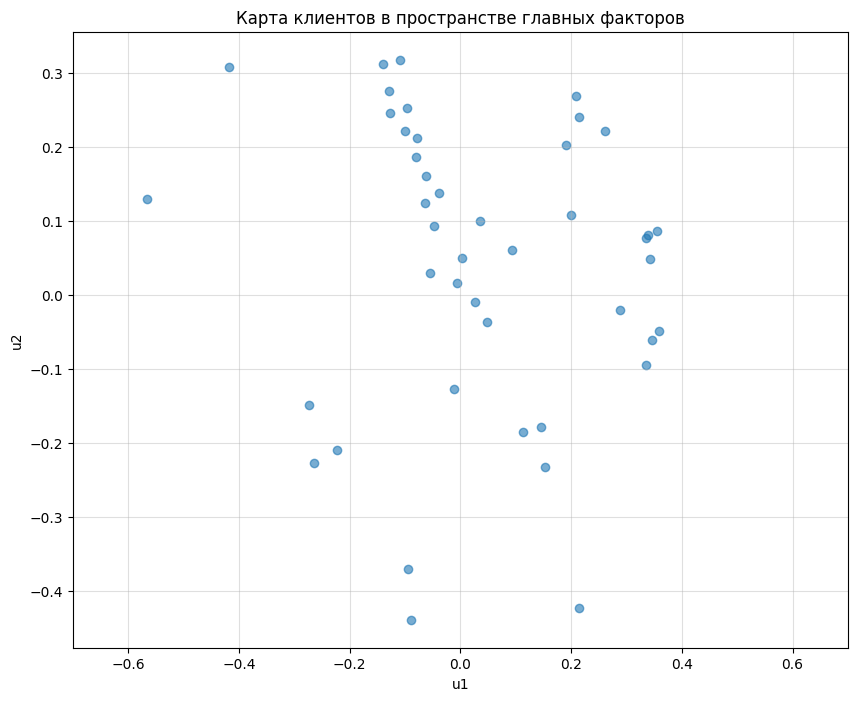

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

x = client_map[:, 0]  
y = client_map[:, 1]  

plt.xlim(-0.7, 0.7)

ax.scatter(x, y, alpha=0.6)
ax.set_xlabel('u1')
ax.set_ylabel('u2')
# ax.set_zlabel('u3')
plt.title('Карта клиентов в пространстве главных факторов')
plt.grid(alpha=0.4)
plt.show()

Интерпретация осей:

$u1$ (первый главный фактор) — уровень жизни. Объясняет наибольшую долю вариации в данных. Клиенты с близкими значениями u1 имеют схожий «основной профиль» (по совокупности исходных признаков).

$u2$ (второй фактор) — размер кредита. Ортогонален первому, отражает независимое направление различий между клиентами.

#### Добавить интерпретацию осей и почему выбрали эти признаки. Вывести матрицы V, U, S. Показать бы корреляцию между главными компонентами (скрытыми факторами) и исходными признаками Z.

#### М.б. первая компонента связана с финансами, а вторая - с оседлостью и возрастом.

Далее создаем 2D график распределения клиентов по первым двум главным факторам. После снижения размерности представить данные можно так:

Исходная матрица $X$ проецируется в пространство главных компонент:

$$
Z_k = U_k \Sigma_k
$$

где $Z_k$ содержит координаты клиентов в системе из $k$ главных факторов.

Также:
- $\mathbf{u}_1, \mathbf{u}_2$ — ортогональные направления максимальной дисперсии
- Чем больше сингулярное число, тем важнее соответствующая компонента
- Близкое расположение → схожие характеристики по исходным признакам
- Удалённое положение → существенные различия в профилях клиентов

Полученная PCA-карта отображает распределение клиентов банка в двумерном пространстве, где каждая ось отражает обобщённые свойства исходных данных.

#### Сделаем выводы из полученной карты клиентов: 

Карта клиентов показывает, что клиенты распределены неравномерно — наблюдается несколько устойчивых групп (кластеров).

- Кластер 0 (центр, 30 чел.) — основная масса клиентов со «средними» характеристиками по обоим факторам. Это базовая клиентская аудитория банка.

- Кластер 1 (справа-вверх, 17 чел.) — клиенты с повышенным значением первого фактора → c более высокими дохадами, уровнем жизни. Это перспективная целевая группа.

- Кластер 3 (внизу, 21 чел.) — клиенты с пониженным значением второго фактора → клиенты с малой стоимостью кредита. 

- Кластер 2 (лево-верх, 4 чел.) — небольшая, особенная группа с уникальным поведением; вероятно, аномальные или VIP-клиенты.

- Выбросы (2 клиента) — нетипичные профили, возможны ошибки данных или уникальные случаи.

#### Сделать кластеризацию каким-то из известных методов. Например, k-means.

#### Итого: 
Анализ показал наличие четырёх основных кластеров клиентов с различными характеристиками. Карта клиентов демонстрирует наличие как «основной» массы клиентов со средними значениями факторов, так и выделяющихся сегментов (в том числе малых и потенциально VIP-групп).
Таким образом, метод позволил наглядно представить многомерные данные о клиентах и выявить скрытые закономерности.

## Снижение размерности. Метод MDS (Multidimensional Scaling, многомерное шкалирование)

### 9. Вычислите расстояние между клиентами любым понравившемся вам способом (расстояние Чебышева, Манхэттенских кварталов, Минковского). Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением всех расстояний между клиентами.

In [128]:
from scipy.spatial import distance
import numpy as np

matr_for_task_9_default = new_matr

D = distance.squareform(distance.pdist(matr_for_task_9_default, metric='euclidean'))

print(D)

[[0.         0.43666406 0.15195142 ... 0.38037409 0.32528307 0.18081078]
 [0.43666406 0.         0.44595201 ... 0.7665127  0.25512608 0.48555904]
 [0.15195142 0.44595201 0.         ... 0.32098161 0.37752828 0.0511842 ]
 ...
 [0.38037409 0.7665127  0.32098161 ... 0.         0.66023715 0.28660758]
 [0.32528307 0.25512608 0.37752828 ... 0.66023715 0.         0.42696142]
 [0.18081078 0.48555904 0.0511842  ... 0.28660758 0.42696142 0.        ]]


Здесь берётся нормализованная матрица данных (наша $Z$ после центрирования и нормировки).
Эта матрица — основа для построения матрицы расстояний между клиентами.

distance.pdist(...) — вычисляет попарные расстояния между всеми строками (объектами) в матрице (евклидова метрика):

$$
d_{ij} = \sqrt{\sum_{k} (x_{ik} - x_{jk})^2}
$$


In [129]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(D)

print("Stress:", mds.stress_)

Stress: 0.24391936379180157


d:\VS Code\Projects\lab1_DAM\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Далее создали модель MDS:

- n_components=2 — мы хотим разместить объекты в 2D-пространстве (для визуализации);
- dissimilarity='precomputed' — говорим модели, что мы уже вычислили матрицу расстояний $D$;
- random_state=42 — фиксируем начальное состояние генератора случайных чисел для воспроизводимости результатов.

Метод fit_transform(D) выполняет собственно многомерное шкалирование, то есть находит такие двумерные координаты объектов, при которых расстояния между ними в новом пространстве максимально близки к исходным (из матрицы $D$).

В результате:

- coords — это матрица $n \times 2$;
- каждая строка — новый объект (клиент);
- каждый столбец — координата в новом двумерном пространстве (аналог "карты клиентов", но построенной по методу MDS).

mds.stress — это значение стресса (stress) — мера того, насколько хорошо двумерное представление сохраняет исходные расстояния между точками.

$$
\text{Stress} = \sqrt{\frac{\sum_{i<j} (d_{ij} - \delta_{ij})^2}{\sum_{i<j} \delta_{ij}^2}}
$$

где:

- $d_{ij}$ — расстояния в новом 2D-пространстве,
- $\delta_{ij}$ — исходные расстояния (из $D$).

Чем меньше stress, тем лучше аппроксимация:

- stress < 0.05 — отличное сохранение расстояний;
- 0.05–0.1 — хорошее;
- 0.1–0.2 — среднее;
- больше 0.2 — слабое соответствие.

#### Вычислим расстояние (прикольно взять Манхэтэнское). Оценивать по погрешности (стрессу). Какой вывод - в точности сохранить расстояние не получится. Матрица расстояний D = d(i,j). Ищем такие Xi, чтобы норма расстояний Xi - Xk в точности равнялась d(i,j). MDS решает задачу оптимизации. 

### 10. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности. Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.8 и сделайте выводы. 

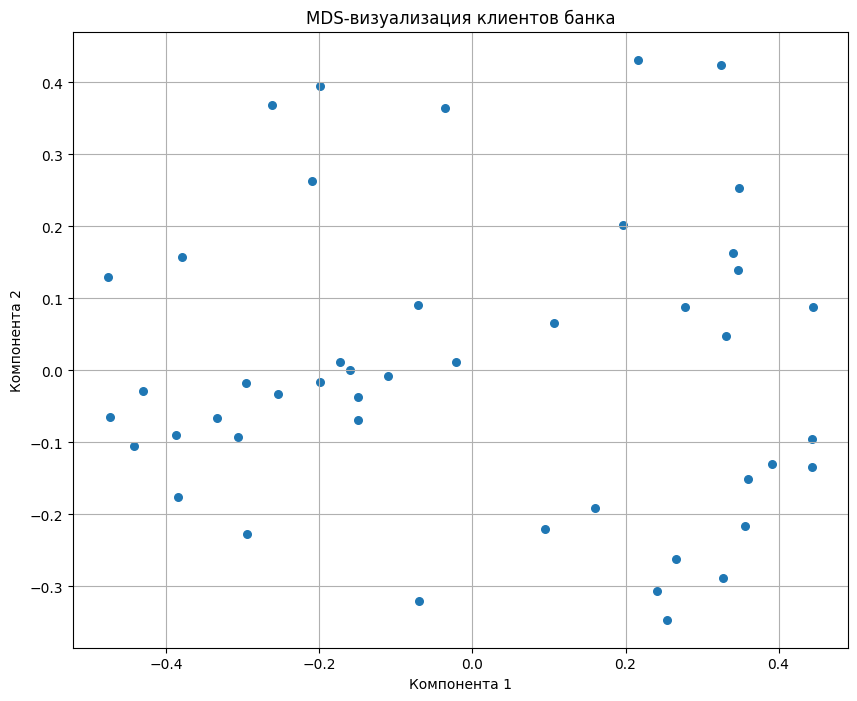

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=30)

plt.title("MDS-визуализация клиентов банка")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

Получили MDS-карту клиентов банка, где каждая точка отражает одного клиента в пространстве, построенном на основе сохранения расстояний между клиентами в исходных данных.

Если две точки на карте находятся близко друг к другу, значит их профили по признакам (возраст, доход, размер кредита и т.д.) похожи.

Если они удалены, клиенты сильно различаются по своим характеристикам.

Таким образом, карта MDS отражает взаимосвязь клиентов и возможные кластеры (группы со схожими социально-экономическими признаками).

По структуре карты MDS и карта из п.8 сходятся — те же сегменты клиентов видны на обеих картах; MDS не выявил новых радикально отличающихся сегментов. Следовательно, первичный вывод из п.8 (наличие 4 сегментов, описание их свойств) остаётся в силе.

#### Карты должны по сути быть одними и теми же при повороте одной из них на какой-то угол.